# <b> <span style='color:#F1C40F'>|</span> PS 3.1</b>

# <b> <span style='color:#F1C40F'>|</span> Table of Contents</b>

* [1 | Import Necessary Libraries](#1)<br>
* [2 | Load Data](#2)
* [3 | Extra Dataset](#3)<br>
* [4 | Plot](#4)<br>
    - [4.1 | Excluding Values](#4.1)<br>
* [5 | Feature Engineer](#5)<br>
* [6 | Models](#6)<br>
    - [6.1 | Catboost](#6.1)<br>
    - [6.2 | XGBoost](#6.2)<br>
    - [6.3 | LGBM](#6.2)<br>
* [7 | Submission](#7)<br>
* [8 | Inspiration](#8)<br>

<a id="1"></a>
# <b>1 </b><b> <span style='color:#F1C40F'>|</span> Import Necessary Libraries</b>

In [43]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

from sklearn.decomposition import PCA
import reverse_geocoder as rg
from sklearn.preprocessing import LabelEncoder
from haversine import haversine
from shapely.geometry import LineString, Point

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

<a id="2"></a>
# <b>2 </b><b> <span style='color:#F1C40F'>|</span> Load Data</b>

In [44]:
path = "D:/06-Kaggle/Kaggle/Regression/PlayGroud_3.1/"
train = pd.read_csv(path+'train.csv')
test = pd.read_csv(path+'test.csv')
submission = pd.read_csv(path+'sample_submission.csv')

In [45]:
train.head()

,id,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980
1,1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946
2,2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576
3,3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336
4,4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500


<a id="3"></a>
# <b>3 </b><b> <span style='color:#F1C40F'>|</span> Extra Dataset</b>

In [46]:
train = train.drop('id', axis=1)
extra_data = fetch_california_housing()
df = pd.DataFrame(extra_data['data'])
df['MedHouseVal'] = extra_data['target']
df.columns = train.columns

In [47]:
df_train = pd.concat([train, df],axis=0, ignore_index=True)

<a id="4"></a>
# <b>4 </b><b> <span style='color:#F1C40F'>|</span> Plot</b>

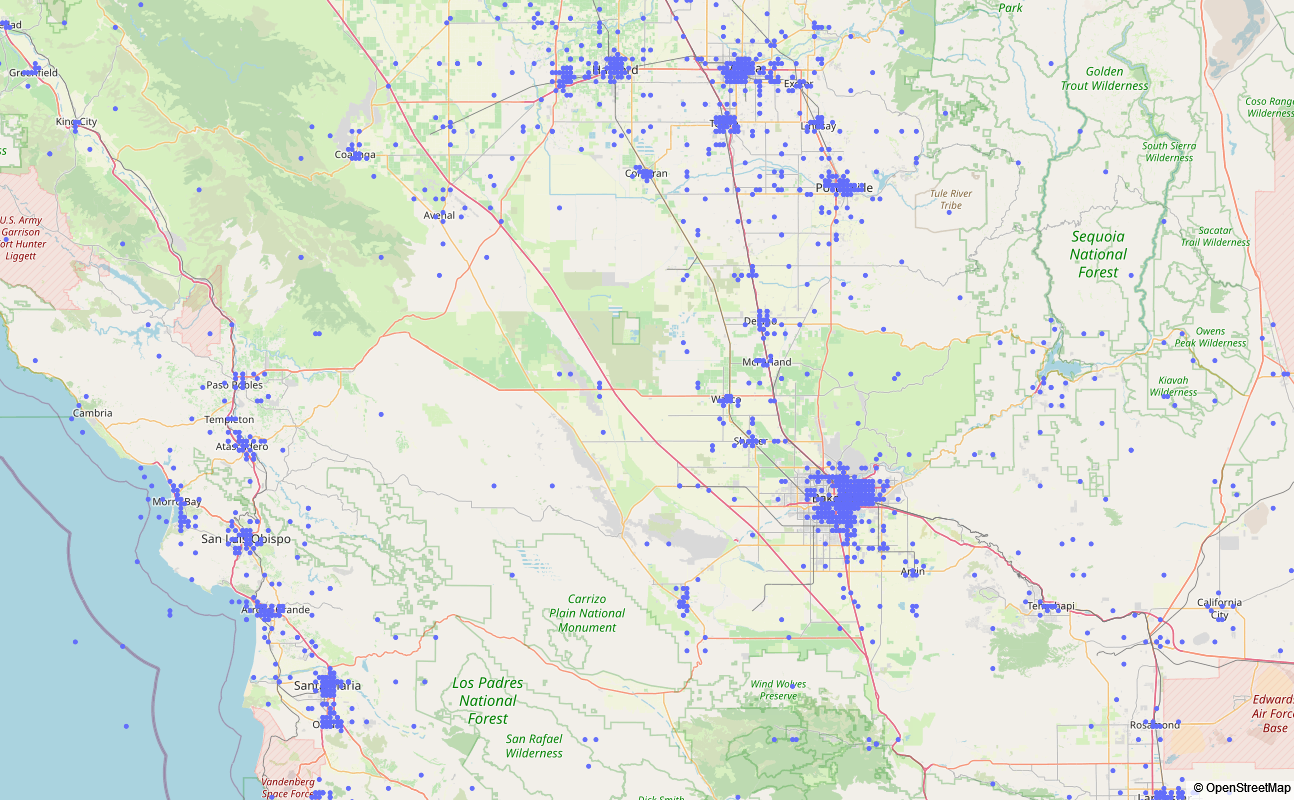

In [48]:
fig = px.scatter_mapbox(df_train,lat="Latitude", lon="Longitude",zoom=8,height=800, width=1200)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

<a id="4.1"></a>
# <b>4.1 </b><b> <span style='color:#F1C40F'>|</span> Excluding Values</b>

In [49]:
print(df_train.loc[(df_train['Latitude']==32.74) & (df_train['Longitude']==-121.11)])
print(df_train.loc[(df_train['Latitude']==32.71) & (df_train['Longitude']==-121.31)])
print(df_train.loc[(df_train['Latitude']==33.98) & (df_train['Longitude']==-123.21)])
print(df_train.loc[(df_train['Latitude']==35.12) & (df_train['Longitude']==-121.61)])

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \

33228  3.2188      36.0  4.969957    1.08172       671.0  2.763441     32.74   



       Longitude  MedHouseVal  

33228    -121.11        1.667  

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \

34363  1.7878      17.0  2.814748    1.06295      1799.0  1.471642     32.71   



       Longitude  MedHouseVal  

34363    -121.31         0.55  

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \

20991  3.4872      27.0  5.766382    1.06993      1520.0  2.448413     33.98   



       Longitude  MedHouseVal  

20991    -123.21         1.37  

       MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \

23326  4.0682      34.0  5.459459   0.951351       470.0  3.121622     35.12   



       Longitude  MedHouseVal  

23326    -121.61        2.326  


In [50]:
df_train = df_train.drop([df_train.index[33228], df_train.index[34363],df_train.index[20991],df_train.index[23326]])

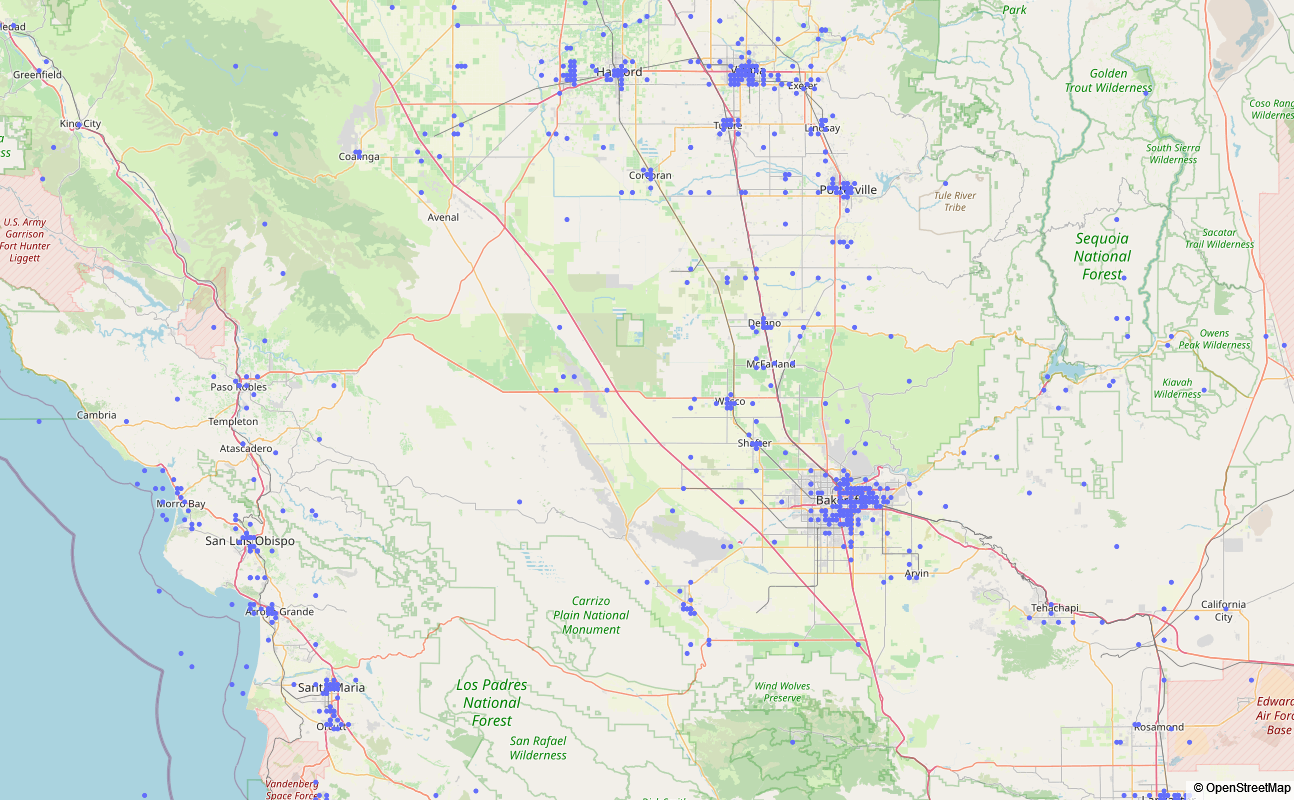

In [51]:
fig = px.scatter_mapbox(test,lat="Latitude", lon="Longitude",zoom=8,height=800, width=1200)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [52]:
print(test.loc[(test['Latitude']==34.04) & (test['Longitude']==-121.27)])
print(test.loc[(test['Latitude']==33.79) & (test['Longitude']==-121.11)])

         id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \

2252  39389  2.1908      23.0  3.961538   1.026455      1006.0  2.464945   



      Latitude  Longitude  

2252     34.04    -121.27  

         id  MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \

3669  40806  2.8342      36.0  5.122112   1.235931       928.0  2.973597   



      Latitude  Longitude  

3669     33.79    -121.11  


In [53]:
test = test.drop([test.index[2252], test.index[3669]])

In [54]:
df = pd.concat([df_train, test],axis=0, ignore_index=True)

In [55]:
df = df.drop_duplicates()

<a id="5"></a>
# <b>5 </b><b> <span style='color:#F1C40F'>|</span> Feature Engineer</b>

In [56]:
df['r'] = np.sqrt(df['Latitude']**2 + df['Longitude']**2)
df['theta'] = np.arctan2(df['Latitude'], df['Longitude'])

In [58]:
emb_size = 20
precision = 1e6 

latlon = np.expand_dims(df[['Latitude', 'Longitude']].values, axis=-1) 

m = np.exp(np.log(precision) / emb_size) 

angle_freq = m ** np.arange(emb_size) 
angle_freq = angle_freq.reshape(1, 1, emb_size) 

latlon = latlon * angle_freq 

latlon[..., 0::2] = np.cos(latlon[..., 0::2]) 
latlon[..., 1::2] = np.sin(latlon[..., 1::2]) 
latlon = latlon.reshape(-1, 2 * emb_size) 

df['exp_latlon1'] = [lat[0] for lat in latlon]
df['exp_latlon2'] = [lat[1] for lat in latlon]

In [59]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,id,r,theta,exp_latlon1,exp_latlon2
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,NaN,125.003898,2.861139,-0.999098,-0.078880
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,NaN,127.244664,2.832641,0.547947,0.974193
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,NaN,125.351452,2.861025,-0.988397,0.140055
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,NaN,121.559630,2.869576,0.320941,0.723030
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,NaN,128.113419,2.842084,0.994915,0.022690


In [60]:
def pca(data):
    '''
    input: dataframe containing Latitude(x) and Longitude(y)
    '''
    coordinates = data[['Latitude','Latitude']].values
    pca_obj = PCA().fit(coordinates)
    pca_x = pca_obj.transform(data[['Latitude', 'Longitude']].values)[:,0]
    pca_y = pca_obj.transform(data[['Latitude', 'Longitude']].values)[:,1]
    return pca_x, pca_y

# train_df['pca_x'], train_df['pca_y'] = pca(train_df)
# test_df['pca_x'], test_df['pca_y'] = pca(test_df)
df['pca_x'], df['pca_y'] = pca(df)

In [61]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,id,r,theta,exp_latlon1,exp_latlon2,pca_x,pca_y
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,NaN,125.003898,2.861139,-0.999098,-0.078880,-110.809318,109.403561
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,NaN,127.244664,2.832641,0.547947,0.974193,-108.695069,113.073445
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,NaN,125.351452,2.861025,-0.988397,0.140055,-110.964882,109.714688
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,NaN,121.559630,2.869576,0.320941,0.723030,-110.038572,105.889240
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,NaN,128.113419,2.842084,0.994915,0.022690,-110.165851,113.285577


In [62]:
def crt_crds(df): 
    df['rot_15_x'] = (np.cos(np.radians(15)) * df['Longitude']) +(np.sin(np.radians(15)) * df['Latitude'])
    
    df['rot_15_y'] = (np.cos(np.radians(15)) * df['Latitude']) + (np.sin(np.radians(15)) * df['Longitude'])
    
    df['rot_30_x'] = (np.cos(np.radians(30)) * df['Longitude']) + (np.sin(np.radians(30)) * df['Latitude'])
    
    df['rot_30_y'] = (np.cos(np.radians(30)) * df['Latitude']) + (np.sin(np.radians(30)) * df['Longitude'])
    
    df['rot_45_x'] = (np.cos(np.radians(45)) * df['Longitude']) + (np.sin(np.radians(45)) * df['Latitude'])
    return df

# train_df = crt_crds(train_df)
# test_df = crt_crds(test_df)
df = crt_crds(df)

In [63]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,id,...,theta,exp_latlon1,exp_latlon2,pca_x,pca_y,rot_15_x,rot_15_y,rot_30_x,rot_30_y,rot_45_x
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,NaN,...,2.861139,-0.999098,-0.078880,-110.809318,109.403561,-107.071871,2.331690,-86.726972,-30.095521,-60.471772
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,NaN,...,2.832641,0.547947,0.974193,-108.695069,113.073445,-107.075820,5.997626,-85.634599,-27.103477,-58.357523
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,NaN,...,2.861025,-0.988397,0.140055,-110.964882,109.714688,-107.362157,2.352531,-86.957760,-30.165258,-60.627335
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,NaN,...,2.869576,0.320941,0.723030,-110.038572,105.889240,-104.647225,1.242015,-85.072915,-30.260610,-59.701026
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,NaN,...,2.842084,0.994915,0.022690,-110.165851,113.285577,-108.455620,4.829957,-87.110170,-28.469240,-59.828305


In [64]:
def geocoder(df):
    coordinates = list(zip(df['Latitude'], df['Longitude']))
    results = rg.search(coordinates)
    return results


results = geocoder(df)
df['place'] = [x['admin2'] for x in results]

places = ['Los Angeles County', 'Orange County', 'Kern County',
          'Alameda County', 'San Francisco County', 'Ventura County',
          'Santa Clara County', 'Fresno County', 'Santa Barbara County',
          'Contra Costa County', 'Yolo County', 'Monterey County',
          'Riverside County', 'Napa County']

def replace(x):
    if x in places:
        return x
    else:
        return 'Other'

df['place'] = df['place'].apply(lambda x: replace(x))

df = pd.get_dummies(df)

Loading formatted geocoded file...


In [65]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,id,...,place_Monterey County,place_Napa County,place_Orange County,place_Other,place_Riverside County,place_San Francisco County,place_Santa Barbara County,place_Santa Clara County,place_Ventura County,place_Yolo County
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,NaN,...,0,0,0,0,0,0,1,0,0,0
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,NaN,...,0,0,0,1,0,0,0,0,0,0
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,NaN,...,0,0,0,0,0,0,1,0,0,0
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,NaN,...,0,0,0,1,0,0,0,0,0,0
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,NaN,...,0,0,0,0,0,1,0,0,0,0


In [66]:
Sac = (38.576931, -121.494949)
SF = (37.780080, -122.420160)
SJ = (37.334789, -121.888138)
LA = (34.052235, -118.243683)
SD = (32.715759, -117.163818)

df['dist_Sac'] = df.apply(lambda x: haversine((x['Latitude'], x['Longitude']), Sac, unit='ft'), axis=1)
df['dist_SF'] = df.apply(lambda x: haversine((x['Latitude'], x['Longitude']), SF, unit='ft'), axis=1)
df['dist_SJ'] = df.apply(lambda x: haversine((x['Latitude'], x['Longitude']), SJ, unit='ft'), axis=1)
df['dist_LA'] = df.apply(lambda x: haversine((x['Latitude'], x['Longitude']), LA, unit='ft'), axis=1)
df['dist_SD'] = df.apply(lambda x: haversine((x['Latitude'], x['Longitude']), SD, unit='ft'), axis=1)
df['dist_nearest_city'] = df[['dist_Sac', 'dist_SF', 'dist_SJ', 'dist_LA', 'dist_SD']].min(axis=1)

In [67]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,id,...,place_Santa Barbara County,place_Santa Clara County,place_Ventura County,place_Yolo County,dist_Sac,dist_SF,dist_SJ,dist_LA,dist_SD,dist_nearest_city
0,2.3859,15.0,3.827160,1.112100,1280.0,2.486989,34.60,-120.12,0.980,NaN,...,1,0,0,0,1.505644e+06,1.343215e+06,1.125962e+06,5.995613e+05,1.130527e+06,599561.346601
1,3.7188,17.0,6.013373,1.054217,1504.0,3.813084,38.69,-121.22,0.946,NaN,...,0,0,0,0,8.854832e+04,4.779710e+05,5.303822e+05,1.904151e+06,2.488078e+06,88548.323144
2,4.7750,27.0,6.535604,1.103175,1061.0,2.464602,34.71,-120.45,1.576,NaN,...,1,0,0,0,1.443453e+06,1.261031e+06,1.047325e+06,7.062707e+05,1.234280e+06,706270.711605
3,2.4138,16.0,3.350203,0.965432,1255.0,2.089286,32.66,-117.09,1.336,NaN,...,0,0,0,0,2.522266e+06,2.451054e+06,2.227410e+06,6.176880e+05,3.045445e+04,30454.454611
4,3.7500,52.0,4.284404,1.069246,1793.0,1.604790,37.80,-122.41,4.500,NaN,...,0,0,0,0,3.862307e+05,7.835185e+03,2.271009e+05,1.839177e+06,2.424468e+06,7835.184568


In [69]:
coast_points = LineString([(32.6644, -117.1613), (33.2064, -117.3831),
                           (33.7772, -118.2024), (34.4634, -120.0144),
                           (35.4273, -120.8819), (35.9284, -121.4892),
                           (36.9827, -122.0289), (37.6114, -122.4916),
                           (38.3556, -123.0603), (39.7926, -123.8217),
                           (40.7997, -124.1881), (41.7558, -124.1976)])

df['dist_to_coast'] = df.apply(lambda x: Point(x['Latitude'], x['Longitude']).distance(coast_points), axis=1)

In [71]:
# combine latitude and longitude
# codes from 
# https://datascience.stackexchange.com/questions/49553/combining-latitude-longitude-position-into-single-feature
from math import radians, cos, sin, asin, sqrt

def single_pt_haversine(lat, lng, degrees=True):
    """
    'Single-point' Haversine: Calculates the great circle distance
    between a point on Earth and the (0, 0) lat-long coordinate
    """
    r = 6371 # Earth's radius (km). Have r = 3956 if you want miles

    # Convert decimal degrees to radians
    if degrees:
        lat, lng = map(radians, [lat, lng])

    # 'Single-point' Haversine formula
    a = sin(lat/2)**2 + cos(lat) * sin(lng/2)**2
    d = 2 * r * asin(sqrt(a)) 

    return d
# add more metric 
# referred to this discussion
# https://www.kaggle.com/competitions/playground-series-s3e1/discussion/376210

def manhattan(lat,lng):
    return np.abs(lat) + np.abs(lng)
def euclidean(lat,lng):
    return (lat**2 + lng**2) **0.5

def add_combine(df):      
    df['haversine'] = [single_pt_haversine(x, y) for x, y in zip(df.Latitude, df.Longitude)]
    df['manhattan'] = [manhattan(x,y) for x,y in zip(df.Latitude, df.Longitude)]
    df['euclidean'] = [euclidean(x,y) for x,y in zip(df.Latitude,df.Longitude)]
    return df

df = add_combine(df)

In [93]:
train_df = df.iloc[:-len(test),:]
test_df = df.iloc[-len(test):,:].drop('MedHouseVal', axis=1).reset_index(drop=True)

X = train_df.drop(['MedHouseVal', 'id'], axis=1)
y = train_df.MedHouseVal
X_test = test_df.drop('id', axis=1)

<a id="6"></a>
# <b>6 </b><b> <span style='color:#F1C40F'>|</span> Models</b>

<a id="6.1"></a>
# <b>6.1 </b><b> <span style='color:#F1C40F'>|</span> Catboost</b>

In [94]:
import catboost
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

n_folds = 15

MAX_ITER = 15000
PATIENCE = 1000
DISPLAY_FREQ = 100

eval_predsCB = []
predsCB = []

k_fold = KFold(n_splits=n_folds, random_state=42, shuffle=True)

MODEL_PARAMS = {
                'random_seed': 1234,    
                 'learning_rate': 0.1,   # 0.15: 0.5678, 0.12: 0.5685, 0.1: 0.56757, 0.05: 0.57, 0.01, 0.57             
                'iterations': MAX_ITER,
                'early_stopping_rounds': PATIENCE,
                 'metric_period': DISPLAY_FREQ,
                'use_best_model': True,
                'eval_metric': 'RMSE',
                'verbose': 1000,
                 'task_type': 'GPU'
               }


for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model_catboost = catboost.CatBoostRegressor(**MODEL_PARAMS)
    
    model_catboost.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          early_stopping_rounds = PATIENCE,
#           metric_period = DISPLAY_FREQ
         )
    predsCB.append(model_catboost.predict(X_test))
#     eval_predsCB.append(model.predict(X))
    #print("RMSE valid = {}".format(mean_squared_error(y_valid, model_catboost.predict(X_valid))))
    #print("RMSE full = {}".format(mean_squared_error(y, model_catboost.predict(X))))

0:	learn: 1.0855686	test: 1.0923157	best: 1.0923157 (0)	total: 4.59ms	remaining: 1m 8s

1000:	learn: 0.4459194	test: 0.5115013	best: 0.5114366 (986)	total: 4.53s	remaining: 1m 3s

2000:	learn: 0.4013670	test: 0.5113495	best: 0.5101372 (1680)	total: 9.34s	remaining: 1m

bestTest = 0.5101371998

bestIteration = 1680

Shrink model to first 1681 iterations.

RMSE valid = 0.2602399451178343

RMSE full = 0.17734832313554058

0:	learn: 1.0862659	test: 1.0802593	best: 1.0802593 (0)	total: 5.7ms	remaining: 1m 25s

1000:	learn: 0.4467918	test: 0.5040025	best: 0.5040025 (1000)	total: 4.63s	remaining: 1m 4s

2000:	learn: 0.4015816	test: 0.5038078	best: 0.5030400 (1596)	total: 9.37s	remaining: 1m

bestTest = 0.5030400126

bestIteration = 1596

Shrink model to first 1597 iterations.

RMSE valid = 0.25304935059563993

RMSE full = 0.17983019585745036

0:	learn: 1.0849674	test: 1.1008048	best: 1.1008048 (0)	total: 4.96ms	remaining: 1m 14s

1000:	learn: 0.4465972	test: 0.5175130	best: 0.5171980 (951)	to

In [96]:
df_resultado = pd.DataFrame()

In [97]:
df_resultado['Model'] = ['model_catboost']
df_resultado['RMSE Valid'] = mean_squared_error(y_valid, model_catboost.predict(X_valid))
df_resultado['RMSE Full'] = mean_squared_error(y, model_catboost.predict(X))

<a id="6.2"></a>
# <b>6.2 </b><b> <span style='color:#F1C40F'>|</span> XGBoost</b>

In [98]:
from xgboost import XGBRegressor

k_fold = KFold(n_splits=n_folds, random_state=42, shuffle=True)

eval_predsXB = []
predsXB = []

PATIENCE = 200

MODEL_PARAMS = {'n_estimators': 1000,
                'learning_rate': 0.05,
                'max_depth': 4, # 3
                'colsample_bytree': 0.9, # 0.95
                'subsample': 1,
                'reg_lambda': 20,
                'early_stopping_rounds': PATIENCE,
                'tree_method': 'gpu_hist',
                'seed': 1
}

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model_xgboost = XGBRegressor(**MODEL_PARAMS)
    
    model_xgboost.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          verbose = 100
         )
    predsXB.append(model_xgboost.predict(X_test))

[0]	validation_0-rmse:1.86523

[100]	validation_0-rmse:0.55541

[200]	validation_0-rmse:0.53475

[300]	validation_0-rmse:0.52793

[400]	validation_0-rmse:0.52304

[500]	validation_0-rmse:0.51951

[600]	validation_0-rmse:0.51796

[700]	validation_0-rmse:0.51612

[800]	validation_0-rmse:0.51446

[900]	validation_0-rmse:0.51296

[999]	validation_0-rmse:0.51179

[0]	validation_0-rmse:1.87497

[100]	validation_0-rmse:0.54817

[200]	validation_0-rmse:0.52825

[300]	validation_0-rmse:0.52016

[400]	validation_0-rmse:0.51517

[500]	validation_0-rmse:0.51177

[600]	validation_0-rmse:0.50923

[700]	validation_0-rmse:0.50748

[800]	validation_0-rmse:0.50599

[900]	validation_0-rmse:0.50549

[999]	validation_0-rmse:0.50457

[0]	validation_0-rmse:1.86637

[100]	validation_0-rmse:0.56552

[200]	validation_0-rmse:0.54468

[300]	validation_0-rmse:0.53725

[400]	validation_0-rmse:0.53247

[500]	validation_0-rmse:0.52891

[600]	validation_0-rmse:0.52645

[700]	validation_0-rmse:0.52462

[800]	validation

In [99]:
df2 = {'Model': 'xgboost', 'RMSE Valid': mean_squared_error(y_valid, model.predict(X_valid)), 'RMSE Full': mean_squared_error(y, model.predict(X))}
df_resultado = df_resultado.append(df2, ignore_index = True)

,Model,RMSE Valid,RMSE Full
0,Primeiro Modelo,0.249457,0.188074
1,xgboost,0.253585,0.236247


<a id="6.3"></a>
# <b>6.3 </b><b> <span style='color:#F1C40F'>|</span> LGBM</b>

In [100]:
import lightgbm as lgbm
from lightgbm.sklearn import LGBMRegressor

# n_folds = 20
k_fold = KFold(n_splits=n_folds, random_state=42, shuffle=True)

eval_predsLB = []
predsLB = []

MODEL_PARAMS = {'learning_rate': 0.01,
                'max_depth': 9,
                'num_leaves': 90,
                'colsample_bytree': 0.8,
                'subsample': 0.9,
                'subsample_freq': 5,
                'min_child_samples': 36,
                'reg_lambda': 28,
                'n_estimators': 20000,
                'metric': 'rmse',
                'random_state': 1
}

callbacks = [lgbm.early_stopping(30, verbose=1), lgbm.log_evaluation(period=0)]

for train_index, test_index in k_fold.split(X, y):
    X_train, X_valid = X.iloc[train_index], X.iloc[test_index]
    y_train, y_valid = y.iloc[train_index], y.iloc[test_index]
    
    model_lgbm = lgbm.LGBMRegressor(**MODEL_PARAMS)
    
    model_lgbm.fit(X=X_train, y=y_train,
          eval_set=[(X_valid, y_valid)],
          early_stopping_rounds = PATIENCE,
          callbacks=callbacks
         )
    predsLB.append(model_lgbm.predict(X_test))
    eval_predsLB.append(model_lgbm.predict(X))

Training until validation scores don't improve for 30 rounds

Early stopping, best iteration is:

[1577]	valid_0's rmse: 0.50594

Early stopping, best iteration is:

[1430]	valid_0's rmse: 0.501134

Early stopping, best iteration is:

[1430]	valid_0's rmse: 0.501134

Early stopping, best iteration is:

[1430]	valid_0's rmse: 0.501134

Early stopping, best iteration is:

[1430]	valid_0's rmse: 0.501134

Early stopping, best iteration is:

[1430]	valid_0's rmse: 0.501134

Early stopping, best iteration is:

[1430]	valid_0's rmse: 0.501134

Early stopping, best iteration is:

[1430]	valid_0's rmse: 0.501134

Early stopping, best iteration is:

[1344]	valid_0's rmse: 0.496707

Early stopping, best iteration is:

[1344]	valid_0's rmse: 0.496707

Early stopping, best iteration is:

[1344]	valid_0's rmse: 0.496707

Early stopping, best iteration is:

[1344]	valid_0's rmse: 0.496707

Early stopping, best iteration is:

[1344]	valid_0's rmse: 0.496707

Early stopping, best iteration is:

[1344]

In [101]:
df2 = {'Model': 'LGBMRegressor', 'RMSE Valid': mean_squared_error(y_valid, model_lgbm.predict(X_valid)), 'RMSE Full': mean_squared_error(y, model_lgbm.predict(X))}
df_resultado = df_resultado.append(df2, ignore_index = True)
df_resultado

,Model,RMSE Valid,RMSE Full
0,Primeiro Modelo,0.249457,0.188074
1,xgboost,0.253585,0.236247
2,LGBMRegressor,0.247602,0.206541


<a id="7"></a>
# <b>7 </b><b> <span style='color:#F1C40F'>|</span> Submission</b>

In [102]:
a = 0.4
b = 0.2
c = 0.4

In [103]:
predCB = np.average(np.array(predsCB),axis=0)
predXB = np.average(np.array(predsXB),axis=0)
predLB = np.average(np.array(predsLB),axis=0)
pred = predCB * a + predXB * b + predLB * c

In [106]:
vals = train_df['MedHouseVal'].unique().tolist()
submission['MedHouseVal'] = submission['MedHouseVal'].apply(lambda x: min(vals, key=lambda v: abs(v - x)))
submission.MedHouseVal.clip(0, 5, inplace=True)

In [ ]:
submission.to_csv('submission.csv', index=False)

<a id="8"></a>
# <b>8 </b><b> <span style='color:#F1C40F'>|</span> Inspiration</b>